<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/sound_librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [ ]:
# from google.colab import files
# fn = files.upload()

import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')
s = librosa.util.normalize(s)

In [ ]:
ipd.Audio(s, rate=sr)

In [ ]:
librosa.display.waveplot(s, sr)

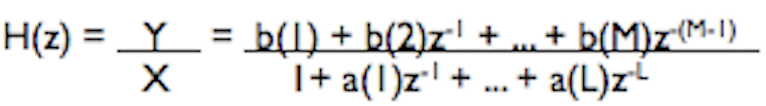

[ 137.6573   378.24213 2326.925   2766.7478  3302.0461  3796.0933
 5239.0293  6515.5684  7367.7812  7983.594   9070.543   9908.407  ]
[505.9534  164.47507  87.93499 182.36824 247.53563 146.70563 279.01437
 210.0086  226.74446 425.40045 430.25104 544.8384 ]


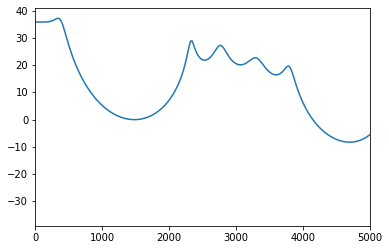

In [6]:
import scipy
M = int(sr/1000+4)
a = librosa.lpc(s[20000:24000], M)

w, h = scipy.signal.freqz(1, a, 513)
plt.plot (w*sr/(2*np.pi), 20*np.log10(np.abs(h)))
plt.xlim((0,5000))


BWcutoff = 2000;
F = np.sort(np.angle(np.roots(a)))
order = np.argsort(np.angle(np.roots(a)))
F = F*sr/(2*np.pi);

BW = -2*np.log(abs(np.roots(a)))*sr/(2*np.pi);
BW = BW[order];

idx = [i for i in range(F.shape[0]) if (F[i] > 0) & (BW[i] < BWcutoff) ]

print(F[idx])
print(BW[idx])


(0.0, 5000.0)

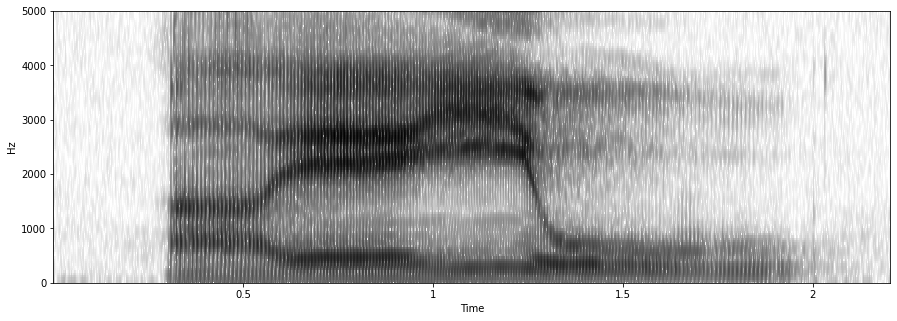

In [7]:
s_preemp = librosa.effects.preemphasis(s)

n_fft=512
hop_length=int(0.001*sr)
win_length=int(sr*0.008)

plt.figure(figsize=(15, 5))

spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')

magspec = np.abs(spec)

dBspec = librosa.amplitude_to_db(magspec, ref=np.max)

librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')

plt.ylim((0,5000))

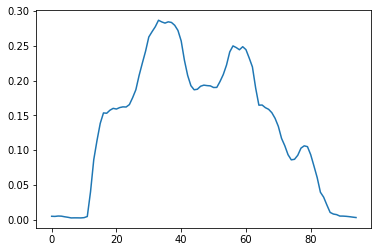

In [8]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

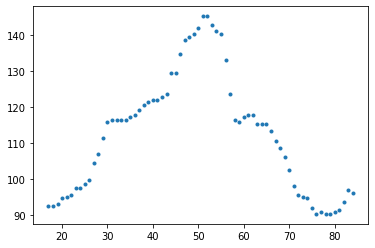

In [9]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')

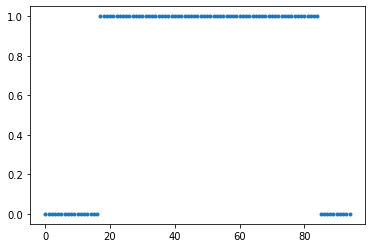

In [10]:
plt.plot(voiced_flag, '.')

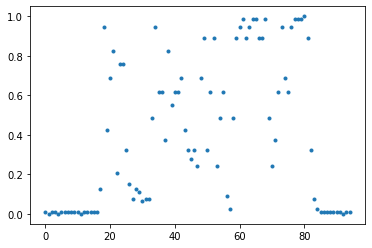

In [11]:
plt.plot(voiced_prob, '.')